# Programming assigment 2
- Tento notebook je kopie notebooku pro QSAR
- Moje je jen bunka [53] (a md bunky nad a pod)

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold

In [58]:
from rdkit import Chem, DataStructs
from rdkit.Chem import PandasTools, AllChem

In [59]:
data = pd.read_csv("dataset.csv")
data.head(5)

,Ambit_InchiKey,Original_Entry_ID,Entrez_ID,Activity_Flag,pXC50,DB,Original_Assay_ID,Tax_ID,Gene_Symbol,Ortholog_Group,SMILES
0,CWYBNSVSYKQGJB-UHFFFAOYNA-N,71541095,6532,A,6.85387,pubchem,727355,9606,SLC6A4,4061,ClC=1C=C(C2CCCCNC2)C=CC1Cl
1,CTETYYAZBPJBHE-UHFFFAOYNA-N,CHEMBL1289,6532,A,6.37000,chembl20,774720,9606,SLC6A4,4061,C(#CI)COC=1C=C(Cl)C(=CC1Cl)Cl
2,FQDRMHHCWZAXJM-UHFFFAOYNA-N,125558,25553,A,9.98297,pubchem,205028,10116,SLC6A4,4061,O1C=2C=C3CC(N)CC3=CC2OC1
3,QRAWNNQNLQPNIZ-UHFFFAOYNA-N,CHEMBL205229,6532,A,7.54000,chembl20,950695,9606,SLC6A4,4061,N1C=C(CCN)C2=C1C(=CC=C2)F
4,HCFHWXDIZOAUTQ-UHFFFAOYNA-N,CHEMBL6376,25553,A,6.11000,chembl20,201505,10116,SLC6A4,4061,C1(=CC=2OCOC2C=C1C)CC(N)C


In [60]:
!pwd

/home/monika/fbmi/chemoinformatika


In [61]:
PandasTools.AddMoleculeColumnToFrame(data,'SMILES','Molecule')

In [62]:
data.head()

,Ambit_InchiKey,Original_Entry_ID,Entrez_ID,Activity_Flag,pXC50,DB,Original_Assay_ID,Tax_ID,Gene_Symbol,Ortholog_Group,SMILES,Molecule
0,CWYBNSVSYKQGJB-UHFFFAOYNA-N,71541095,6532,A,6.85387,pubchem,727355,9606,SLC6A4,4061,ClC=1C=C(C2CCCCNC2)C=CC1Cl,<rdkit.Chem.rdchem.Mol object at 0x7441c6dcc3c0>
1,CTETYYAZBPJBHE-UHFFFAOYNA-N,CHEMBL1289,6532,A,6.37000,chembl20,774720,9606,SLC6A4,4061,C(#CI)COC=1C=C(Cl)C(=CC1Cl)Cl,<rdkit.Chem.rdchem.Mol object at 0x7441c6dcc5f0>
2,FQDRMHHCWZAXJM-UHFFFAOYNA-N,125558,25553,A,9.98297,pubchem,205028,10116,SLC6A4,4061,O1C=2C=C3CC(N)CC3=CC2OC1,<rdkit.Chem.rdchem.Mol object at 0x7442e4a53a00>
3,QRAWNNQNLQPNIZ-UHFFFAOYNA-N,CHEMBL205229,6532,A,7.54000,chembl20,950695,9606,SLC6A4,4061,N1C=C(CCN)C2=C1C(=CC=C2)F,<rdkit.Chem.rdchem.Mol object at 0x7442e4a53990>
4,HCFHWXDIZOAUTQ-UHFFFAOYNA-N,CHEMBL6376,25553,A,6.11000,chembl20,201505,10116,SLC6A4,4061,C1(=CC=2OCOC2C=C1C)CC(N)C,<rdkit.Chem.rdchem.Mol object at 0x7442e4a536f0>


In [ ]:
def mol2fp(mol):
    fp = AllChem.GetHashedMorganFingerprint(mol, 2, nBits=4096)
    ar = np.zeros((1,), dtype=np.int8)
    DataStructs.ConvertToNumpyArray(fp, ar)
    return ar

fp = mol2fp(Chem.MolFromSmiles(data.loc[1,"SMILES"]))

In [65]:
fp

array([0, 0, 0, ..., 0, 0, 0], shape=(4096,), dtype=int8)

In [66]:
len(fp)

4096

In [67]:
data.loc[1,"SMILES"]

'C(#CI)COC=1C=C(Cl)C(=CC1Cl)Cl'

In [68]:
fp.reshape((64,-1))

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(64, 64), dtype=int8)

In [69]:
4096/64

64.0

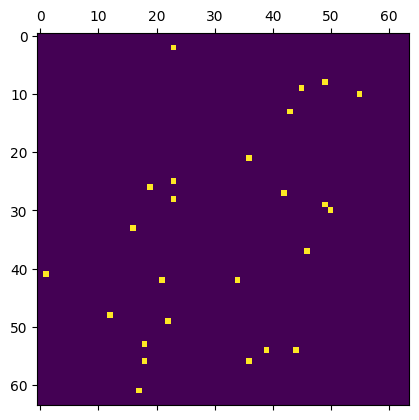

In [70]:
plt.matshow(fp.reshape((64,-1)) > 0)

In [ ]:
data["FPs"] = data.Molecule.apply(mol2fp)

In [72]:
data["FPs"].head(5)

0    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
1    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
2    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
3    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
4    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
Name: FPs, dtype: object

In [73]:
X = np.stack(data.FPs.values)

In [74]:
data.FPs.values

array([array([0, 0, 0, ..., 0, 0, 0], shape=(4096,), dtype=int8),
       array([0, 0, 0, ..., 0, 0, 0], shape=(4096,), dtype=int8),
       array([0, 0, 0, ..., 0, 0, 0], shape=(4096,), dtype=int8), ...,
       array([0, 2, 0, ..., 0, 0, 0], shape=(4096,), dtype=int8),
       array([0, 2, 0, ..., 0, 0, 0], shape=(4096,), dtype=int8),
       array([0, 2, 0, ..., 0, 0, 0], shape=(4096,), dtype=int8)],
      shape=(7228,), dtype=object)

In [75]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 2, 0, ..., 0, 0, 0],
       [0, 2, 0, ..., 0, 0, 0],
       [0, 2, 0, ..., 0, 0, 0]], shape=(7228, 4096), dtype=int8)

In [76]:
y = data.pXC50.values.reshape((-1,1))

In [77]:
y

array([[6.85387],
       [6.37   ],
       [9.98297],
       ...,
       [6.60206],
       [6.8    ],
       [6.14   ]], shape=(7228, 1))

## Zacatek prvni casti ukolu
- natrenovat model pro predikci aktivity na zaklade struktury pomoci standardnich pristupu strojoveho uceni

In [53]:
import time
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.10, random_state=42)
# Pro regresni modely neni vhodne pouzivat standard scaler -> zmeni to uplne rozsah vysledku
# #Normalizing output using standard scaling
# scaler = StandardScaler()
# y_train = scaler.fit_transform(y_train)
# y_test = scaler.transform(y_test)

def log(msg):
    elapsed = time.time() - start
    minutes = int(elapsed // 60)
    seconds = int(elapsed % 60)
    print(f"[{minutes:02d}:{seconds:02d}] {msg}")

models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "Support Vector Regression": SVR(),
}

for name, model in models.items():
    print(f"\n=== {name} ===")
    start = time.time()

    log("Start training")
    model.fit(X_train, y_train.ravel())

    log("Start prediction")
    y_pred = model.predict(X_test)

    log("Start evaluation")
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    log("Done")
    print("= Results: =")
    print(f"MSE: {mse:.4f}")
    print(f"R^2 Score: {r2:.4f}")


=== Linear Regression ===
[00:00] Start training
[00:38] Start prediction
[00:38] Start evaluation
[00:38] Done
= Results: =
MSE: 2.2463
R^2 Score: -0.6437

=== Random Forest ===
[00:00] Start training
[01:59] Start prediction
[01:59] Start evaluation
[01:59] Done
= Results: =
MSE: 0.4385
R^2 Score: 0.6791

=== Gradient Boosting ===
[00:00] Start training
[01:41] Start prediction
[01:41] Start evaluation
[01:41] Done
= Results: =
MSE: 0.7342
R^2 Score: 0.4628

=== Support Vector Regression ===
[00:00] Start training
[00:42] Start prediction
[00:49] Start evaluation
[00:49] Done
= Results: =
MSE: 0.5251
R^2 Score: 0.6158


### Diskuze k vysledkum
#### Linearni regrese
- Princip: hledani co nejlepsi primky v n-rozmernem prostoru, ktere nejlepe predikuje vyslednou hodnotu
- [-] Vysoky mean squared error znamena, ze je hodne velka chyba na testovacich datech
- [-] Zaporny R squared znamena, ze je predikce modelem horsi, nez kdyby se pouzil prumer hodnot (v grafu jako horizontalni linie)
- Model je velmi nevhodny pro tuto ulohu (dokaze predikovat jen linearni vztahy)
#### Random forest regressor
- Princip: velky pocet rozhodnovacich stromu, vysledna hodnota je prumer ze vsech stromu (na rozdil od stromu pro klasifikaci ma kazdy lsit nejake cislo, ktere je vypocteno jako prumer hodnot, ktere spadly do tohoto listu, jinak se rozhoduje stejne)
- [+] Pomerne nizky mean squared error
- [+] Pomerne dobry R squared (nejlepsi z porovnavanych modelu)
- Nejlepsi vysledky ze vsech modelu, jedinou nevyhodou je delsi trenink (cca 2 minuty)
#### Gradient boosting
- Princip: Tvori serie stromu, kde kazdy dalsi strom opravuje chyby predchoziho, na rozdil od random forestu tvori stromy postupne
- [/] Stredne vysoky mean squared error (vyssi nez u random forestu ale vyrazne nizsi nez u linearni regrese)
- [/] R squared alespon v kladnych hodnotach, ale stale mensi nez 0.5
- Tento model neni nejhorsi, ale skvele vysledky nema a take se trenuje dlouho
#### Support vector regression
- Princip: Hleda funkci, ktera se vejde do epsilon zony (coz je nejaka tolerance) a zaroven je co nejhladsi, vyuziva kernely pro prevod dat do vyssiho rozmeru. kde je mozne najit linearni oddeleni a tim umoznuje nelinearni vztahy
- [+] Mean squared error je o neco vyssi nez u random forestu, ale stale asi unosna hodnota
- [+] R squared je jen o neco nizsi nez u random forestu, taky docela v pohode vysledek
- Tento model neni spatny, ale je o neco horsi nez random forest, vyhoda muze byt, ze se trenuje velmi rychle

### Nejlepsi: Random forest regressor

### Zacatek neuronove site

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.10, random_state=42)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train,  test_size=0.05, random_state=42)
#Normalizing output using standard scaling
scaler = StandardScaler()
y_train = scaler.fit_transform(y_train)
y_test = scaler.transform(y_test)
y_validation = scaler.transform(y_validation)

In [79]:
y_validation

array([[ 0.98149849],
       [ 0.10682453],
       [ 0.16821306],
       [ 1.44925375],
       [-0.83578527],
       [-0.58951784],
       [-1.14149656],
       [ 0.45052045],
       [-0.10547497],
       [-1.31982814],
       [ 0.66729522],
       [ 1.07491027],
       [ 1.87315641],
       [ 1.96052191],
       [ 1.17856338],
       [ 0.08984057],
       [-0.52713576],
       [-0.40269428],
       [ 0.41253582],
       [-0.3059961 ],
       [-0.85276923],
       [-0.4366622 ],
       [ 0.57388344],
       [-0.01150272],
       [ 0.60005573],
       [-1.66777854],
       [-1.26781476],
       [-1.26038428],
       [ 1.51649324],
       [-0.01206319],
       [-0.82729329],
       [-0.77634141],
       [-0.93768903],
       [-0.02865652],
       [ 0.58264717],
       [-0.09698299],
       [ 0.70975513],
       [ 0.72673909],
       [ 1.00697443],
       [-0.72410724],
       [-1.3368121 ],
       [-1.14612469],
       [ 0.00649179],
       [ 1.51649324],
       [ 0.74372305],
       [ 1

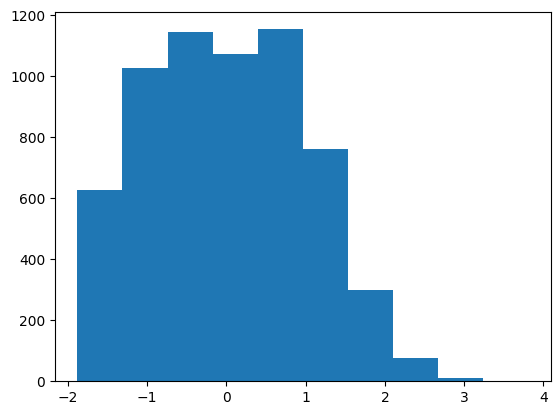

In [80]:
plt.hist(y_train)
plt.show()

In [81]:
X_train.shape

(6179, 4096)

In [82]:
7700*0.85

6545.0

In [83]:
feature_select = VarianceThreshold(threshold=0.05)
X_train = feature_select.fit_transform(X_train)
X_validation = feature_select.transform(X_validation)
X_test = feature_select.transform(X_test)
X_train.shape

(6179, 222)

In [84]:
# Let's get those arrays transfered to the GPU memory as tensors
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
# If you don't have a GPU, buy a graphics card. I have for a long time used a 1060 GTX, which is not that expensive anymore.
X_train = torch.tensor(X_train, device=device).float()
X_test = torch.tensor(X_test, device=device).float()
X_validation = torch.tensor(X_validation, device=device).float()
y_train = torch.tensor(y_train, device=device).float()
y_test = torch.tensor(y_test, device=device).float()
y_validation = torch.tensor(y_validation, device=device).float()
X_train

cpu


tensor([[0., 0., 1.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 1., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 1., 0.]])

In [85]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [86]:
device

device(type='cpu')

In [87]:
from torch.utils.data import TensorDataset
train_dataset = TensorDataset(X_train, y_train)
validation_dataset = TensorDataset(X_validation, y_validation)

In [88]:
train_dataset

In [89]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                          batch_size=256,
                                          shuffle=True)
validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset,
                                          batch_size=256,
                                          shuffle=False)

In [90]:
class Net(nn.Module):
    def __init__(self, input_size, hidden_size, dropout_rate, out_size):
        super(Net, self).__init__()
        # Three layers and a output layer
        self.fc1 = nn.Linear(input_size, hidden_size)  # 1st Full-Connected Layer
        self.fc15 = nn.Linear(hidden_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, hidden_size)
        self.fc_out = nn.Linear(hidden_size, out_size) # Output layer
        #Layer normalization for faster training
        self.ln1 = nn.LayerNorm(hidden_size)
        self.ln15 = nn.LayerNorm(hidden_size)
        self.ln2 = nn.LayerNorm(hidden_size)
        self.ln3 = nn.LayerNorm(hidden_size)
        #LeakyReLU will be used as the activation function
        self.activation = nn.LeakyReLU()
        #Dropout for regularization
        self.dropout = nn.Dropout(dropout_rate)

    def forward(self, x):# Forward pass: stacking each layer together
        # Fully connected =&amp;gt; Layer Norm =&amp;gt; LeakyReLU =&amp;gt; Dropout times 3
        out = self.fc1(x)
        out = self.ln1(out)
        out = self.activation(out)
        out = self.dropout(out)
        out = self.fc15(out)
        out = self.ln15(out)
        out = self.activation(out)
        out = self.dropout(out)
        out = self.fc2(out)
        out = self.ln2(out)
        out = self.activation(out)
        out = self.dropout(out)
        out = self.fc3(out)
        out = self.ln3(out)
        out = self.activation(out)
        out = self.dropout(out)
        #Final output layer
        out = self.fc_out(out)
        return out


In [131]:
#Defining the hyperparameters
input_size = X_train.size()[-1]     # The input size should fit our fingerprint size
hidden_size = 2048   # The size of the hidden layer
dropout_rate = 0.70    # The dropout rate
output_size = 1        # This is just a single task, so this will be one
learning_rate = 0.001  # The learning rate for the optimizer
model = Net(input_size, hidden_size, dropout_rate, output_size)

In [132]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [143]:
model.train() #Ensure the network is in "train" mode with dropouts active
epochs = 100
for e in range(epochs):
    running_loss = 0
    for fps, labels in train_loader:
        # Training pass
        optimizer.zero_grad() # Initialize the gradients, which will be recorded during the forward pa

        output = model(fps) #Forward pass of the mini-batch
        loss = criterion(output, labels) #Computing the loss
        loss.backward() # calculate the backward pass
        optimizer.step() # Optimize the weights

        running_loss += loss.item()
    else:
        if e%10 == 0:
            validation_loss = torch.mean(( y_validation - model(X_validation) )**2).item()
            print("Epoch: %3i Training loss: %0.2F Validation loss: %0.2F"%(e,(running_loss/len(train_loader)), validation_loss))

Epoch:   0 Training loss: 0.25 Validation loss: 0.45
Epoch:  10 Training loss: 0.23 Validation loss: 0.48
Epoch:  20 Training loss: 0.21 Validation loss: 0.42
Epoch:  30 Training loss: 0.21 Validation loss: 0.44
Epoch:  40 Training loss: 0.19 Validation loss: 0.45
Epoch:  50 Training loss: 0.19 Validation loss: 0.45
Epoch:  60 Training loss: 0.18 Validation loss: 0.44
Epoch:  70 Training loss: 0.17 Validation loss: 0.48
Epoch:  80 Training loss: 0.17 Validation loss: 0.43
Epoch:  90 Training loss: 0.16 Validation loss: 0.43


In [144]:
model.eval() #Switch to evaluation mode, where dropout is switched off
y_pred_train = model(X_train)
y_pred_validation = model(X_validation)
y_pred_test = model(X_test)

In [145]:
torch.mean(( y_train - y_pred_train )**2).item()

0.10419189929962158

puvodni error na trenovacich datech: 0.31

In [146]:
torch.mean(( y_validation - y_pred_validation )**2).item()

0.40151453018188477

puvodni error na validacnich datech: 0.47

In [147]:
torch.mean(( y_test - y_pred_test )**2).item()

0.3477819561958313

puvodni error na testovacich datech: 0.44

### Porovnani:
|                | Puvodni    | Novy       |
| -------------- | ---------- | ---------- |
| hidden size    | 1024       | 2048       |
| dropout rate   | 0.80       | 0.70       |
| epochs         | 30         | 100        |
| learning error | 0.31       | 0.10       |
| val. error     | 0.47       | 0.40       |
| test error     | 0.44       | 0.35       |

In [148]:
def flatten(tensor):
    return tensor.cpu().detach().numpy().flatten()

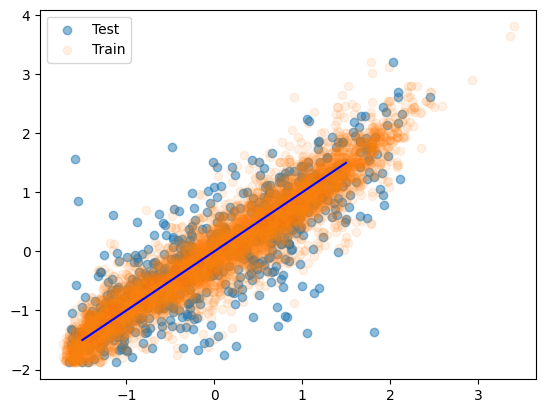

In [149]:
plt.scatter(flatten(y_pred_test), flatten(y_test), alpha=0.5, label="Test")
plt.scatter(flatten(y_pred_train), flatten(y_train), alpha=0.1, label="Train")
plt.legend()
plt.plot([-1.5, 1.5], [-1.5,1.5], c="b")

In [150]:
def predict_smiles(smiles):
    fp = mol2fp(Chem.MolFromSmiles(smiles)).reshape(1,-1)
    fp_filtered = feature_select.transform(fp)
    fp_tensor = torch.tensor(fp_filtered, device=device).float()
    prediction = model(fp_tensor)
    #return prediction.cpu().detach().numpy()
    pXC50 = scaler.inverse_transform(prediction.cpu().detach().numpy())
    return pXC50[0][0]

In [151]:
predict_smiles('Cc1ccc2c(N3CCNCC3)cc(F)cc2n1')

[17:51:46] DEPRECATION WARNING: please use MorganGenerator


np.float32(8.95897)

In [152]:
model

Net(
  (fc1): Linear(in_features=222, out_features=2048, bias=True)
  (fc15): Linear(in_features=2048, out_features=2048, bias=True)
  (fc2): Linear(in_features=2048, out_features=2048, bias=True)
  (fc3): Linear(in_features=2048, out_features=2048, bias=True)
  (fc_out): Linear(in_features=2048, out_features=1, bias=True)
  (ln1): LayerNorm((2048,), eps=1e-05, elementwise_affine=True)
  (ln15): LayerNorm((2048,), eps=1e-05, elementwise_affine=True)
  (ln2): LayerNorm((2048,), eps=1e-05, elementwise_affine=True)
  (ln3): LayerNorm((2048,), eps=1e-05, elementwise_affine=True)
  (activation): LeakyReLU(negative_slope=0.01)
  (dropout): Dropout(p=0.7, inplace=False)
)